## Analysis of Credit Card Data and
## predictive modelling of payment status
## of person for next month.


## Import Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Problem Statement

## The project being prepared to understand whether the credit card customer will make payment default in the next month or not based on number of features.

## Data Loading

In [45]:
df = pd.read_csv(r"C:\Users\Parimal\Downloads\default of credit card clients.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


<AxesSubplot:xlabel='LIMIT_BAL'>

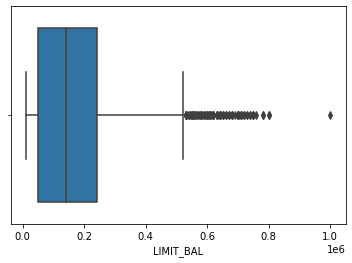

In [46]:
sns.boxplot(df['LIMIT_BAL'])

In [47]:
# q1 = df['LIMIT_BAL'].quantile(0.25)
# q2 = df['LIMIT_BAL'].quantile(0.50)
# q3 = df['LIMIT_BAL'].quantile(0.75)
# IQR = q3-q1
# uppertail = q3+1.5*IQR
# lowertail = q1-1.5*IQR
# # print(' first quartile :-',q1,"\n second qurartile :-",q2,"\n Third quartile :-",q3)
# print(' IQR :-',IQR)
# print(' Uppertail :-',uppertail)
# print(" Lowertail :-",lowertail)

 IQR :- 190000.0
 Uppertail :- 525000.0
 Lowertail :- -235000.0


In [48]:
# # df.loc[df['CreditScore'] < lowertail, 'CreditScore'] = lowertail
# median = df.loc[df['LIMIT_BAL'] < uppertail, 'LIMIT_BAL'].median()
# df.loc[df['LIMIT_BAL'] > uppertail, 'LIMIT_BAL'] = median

In [49]:
x = 1/df['LIMIT_BAL']
df.loc[df['LIMIT_BAL'] > uppertail, 'LIMIT_BAL'] = x

<AxesSubplot:xlabel='LIMIT_BAL'>

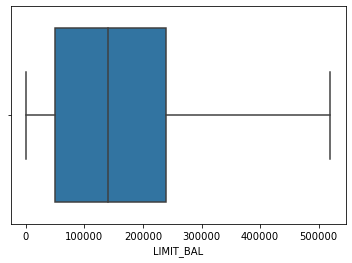

In [50]:
sns.boxplot(df['LIMIT_BAL'])

## PART 1: Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [4]:
df.shape               

(30000, 25)

In [5]:
df.isnull().sum()       # To check null Values

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [6]:
df['default payment next month'].value_counts()                  

0    23364
1     6636
Name: default payment next month, dtype: int64

In [7]:
describe=df.describe()
describe

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Data Slicing (Dependent & Independent Variables)

In [8]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [9]:
x

array([[     1,  20000,      2, ...,      0,      0,      0],
       [     2, 120000,      2, ...,   1000,      0,   2000],
       [     3,  90000,      2, ...,   1000,   1000,   5000],
       ...,
       [ 29998,  30000,      1, ...,   4200,   2000,   3100],
       [ 29999,  80000,      1, ...,   1926,  52964,   1804],
       [ 30000,  50000,      1, ...,   1000,   1000,   1000]], dtype=int64)

In [10]:
y

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

## Imbalancing Technique (Using Smote Technique)

In [11]:
from imblearn.over_sampling import SMOTE                 # Create artificial variable in minority counts
sm = SMOTE()
x_data, y_data = sm.fit_resample(x,y)

In [12]:
print(x_data.shape)
print(y_data.shape)

(46728, 24)
(46728,)


## Counter Function (For check data is balanced or not)

In [13]:
from collections import Counter
print(Counter(y))
print(Counter(y_data))

Counter({0: 23364, 1: 6636})
Counter({1: 23364, 0: 23364})


<AxesSubplot:>

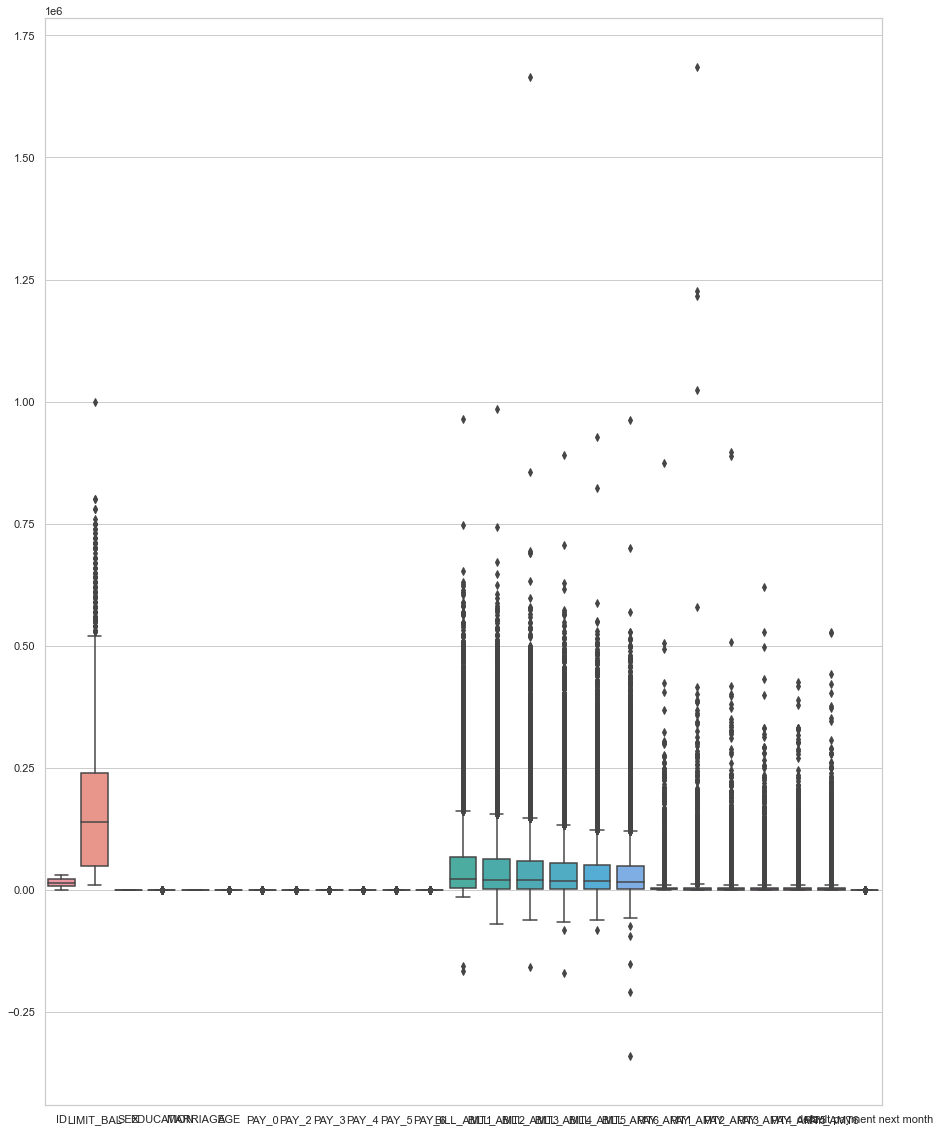

In [14]:
sns.set(style='whitegrid',rc={"figure.figsize":(15, 20)})
sns.boxplot(data=df)

## Apply Feature Scaling (Using Standard Scaler)

In [15]:
from sklearn.preprocessing import StandardScaler             # to Standardize independent Features    
std = StandardScaler()

In [16]:
x_data1 = std.fit_transform(x_data)
x_data1

array([[-1.76734663, -1.06822934,  0.98762155, ..., -0.30285434,
        -0.30052818, -0.28549971],
       [-1.76722808, -0.27426316,  0.98762155, ..., -0.2293392 ,
        -0.30052818, -0.15754694],
       [-1.76710952, -0.51245301,  0.98762155, ..., -0.2293392 ,
        -0.22798412,  0.03438222],
       ...,
       [-0.47614053, -0.19486654, -1.0125336 , ..., -0.05113848,
        -0.05409599, -0.03739929],
       [-0.92001856, -0.83003948, -1.0125336 , ..., -0.25830416,
        -0.27927277, -0.26585896],
       [ 0.23615093,  1.74519776, -1.0125336 , ...,  0.34275567,
         0.32516438,  0.05837336]])

## Detecting Outliers and Eliminate them

[(-5.0, 5.0)]

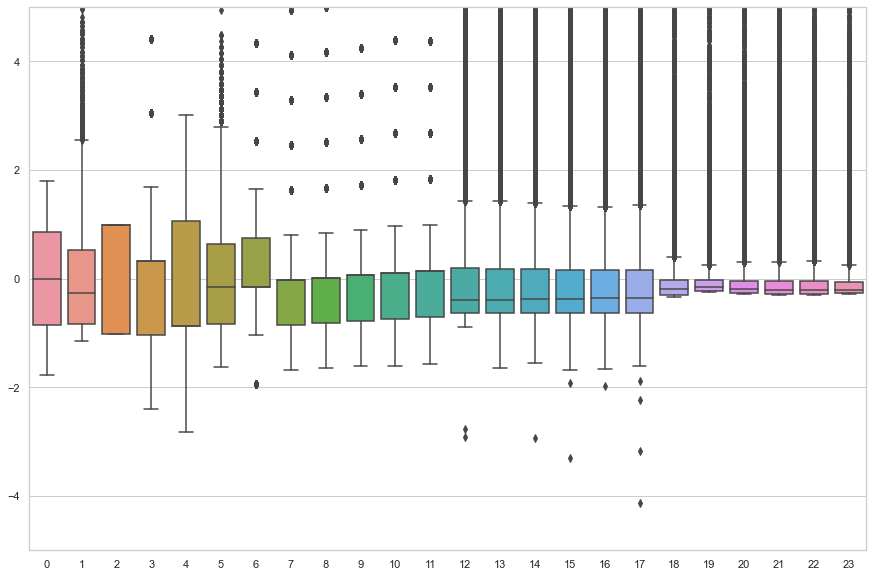

In [17]:
import matplotlib as plt
sns.set(style='whitegrid',rc={"figure.figsize":(15, 10)})
bx=sns.boxplot(data=x_data1)
bx.set(ylim=(-5,5))

#### concatenation of scaled data x_data1 and y_data

In [18]:
scaled_xy=[]
j=0
for i in range(len(y_data)):
    x_data1_temp=list(x_data1[i])
    x_data1_temp.append(y_data[j])
    j=j+1
    scaled_xy.append(x_data1_temp)

In [19]:
np.array(scaled_xy).shape

(46728, 25)

In [20]:
scaled_xy_df=pd.DataFrame(scaled_xy, columns=df.columns)
scaled_xy_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,-1.767347,-1.068229,0.987622,0.319758,-0.881447,-1.294767,1.638751,1.628384,-0.821345,-0.776386,...,-0.667772,-0.658567,-0.652232,-0.339839,-0.218676,-0.283786,-0.302854,-0.300528,-0.285500,1
1,-1.767228,-0.274263,0.987622,0.319758,1.061028,-1.067999,-1.046792,1.628384,0.010071,0.058419,...,-0.617239,-0.602332,-0.597852,-0.339839,-0.202477,-0.220196,-0.229339,-0.300528,-0.157547,1
2,-1.767110,-0.512453,0.987622,0.319758,1.061028,-0.160926,-0.151611,-0.030260,0.010071,0.058419,...,-0.446442,-0.415268,-0.392938,-0.231975,-0.176435,-0.220196,-0.229339,-0.227984,0.034382,0
3,-1.766991,-0.830039,0.987622,0.319758,-0.881447,0.179226,-0.151611,-0.030260,0.010071,0.058419,...,-0.230487,-0.187220,-0.159508,-0.197726,-0.149402,-0.207478,-0.221988,-0.222979,-0.221523,0
4,-1.766872,-0.830039,-1.012534,0.319758,-0.881447,2.446908,-1.046792,-0.030260,-0.821345,0.058419,...,-0.344372,-0.346940,-0.333205,-0.197726,1.655981,0.352117,0.358782,-0.250545,-0.242060,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,1.645084,-0.376637,-1.012534,0.319758,-0.881447,0.065842,1.638751,1.628384,1.672901,1.728031,...,0.675559,0.740075,0.771677,0.108955,-0.003928,-0.148275,-0.072899,-0.072450,-0.085829,1
46724,1.504594,-1.068229,-1.012534,0.319758,1.061028,-1.521535,1.638751,1.628384,0.010071,0.058419,...,-0.422936,-0.369304,-0.362938,-0.339839,-0.171695,-0.188528,-0.119508,-0.300528,-0.221203,1
46725,-0.476141,-0.194867,-1.012534,0.319758,-0.881447,0.065842,1.638751,1.628384,0.010071,0.058419,...,0.885476,0.880003,0.857174,-0.339839,0.076492,-0.026627,-0.051138,-0.054096,-0.037399,1
46726,-0.920019,-0.830039,-1.012534,-1.041047,1.061028,-1.294767,0.743570,-0.030260,0.010071,0.058419,...,-0.537424,-0.513366,-0.515623,-0.167171,-0.155444,-0.245696,-0.258304,-0.279273,-0.265859,1


In [21]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [22]:
print(x_data1.shape)
print(scaled_xy_df.shape)

(46728, 24)
(46728, 25)


In [23]:
x_data1=list(x_data1)
new_data_xy=pd.DataFrame(scaled_xy,columns=df.columns)
de=new_data_xy.describe()
de

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,4.672800e+04,4.672800e+04,4.672800e+04,4.672800e+04,4.672800e+04,4.672800e+04,4.672800e+04,4.672800e+04,4.672800e+04,4.672800e+04,...,4.672800e+04,4.672800e+04,4.672800e+04,4.672800e+04,4.672800e+04,4.672800e+04,4.672800e+04,4.672800e+04,4.672800e+04,46728.000000
mean,-1.270075e-16,1.746639e-15,4.604022e-14,2.250691e-14,-4.737763e-14,4.884608e-17,-1.423651e-14,-4.878147e-14,2.713523e-15,2.950699e-14,...,-6.769966e-16,-4.058273e-16,8.430833e-16,1.439051e-15,1.113210e-15,-1.436978e-16,8.807548e-16,3.179382e-15,1.012730e-15,0.500000
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,...,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,0.500005
min,-1.767347e+00,-1.147626e+00,-1.012534e+00,-2.401853e+00,-2.823922e+00,-1.634919e+00,-1.941973e+00,-1.688905e+00,-1.652760e+00,-1.611192e+00,...,-3.293276e+00,-1.982387e+00,-6.315433e+00,-3.398389e-01,-2.545627e-01,-2.837862e-01,-3.028543e-01,-3.005282e-01,-2.854997e-01,0.000000
25%,-8.583688e-01,-8.300395e-01,-1.012534e+00,-1.041047e+00,-8.814466e-01,-8.412306e-01,-1.516107e-01,-8.595823e-01,-8.213446e-01,-7.763865e-01,...,-6.339033e-01,-6.311250e-01,-6.305533e-01,-2.959436e-01,-2.237281e-01,-2.620383e-01,-2.834463e-01,-2.823196e-01,-2.732162e-01,0.000000
50%,-7.262920e-04,-2.742632e-01,9.876215e-01,3.197578e-01,-8.814466e-01,-1.609259e-01,-1.516107e-01,-3.026011e-02,1.007064e-02,5.841925e-02,...,-3.725885e-01,-3.586509e-01,-3.582685e-01,-1.977255e-01,-1.514857e-01,-1.859207e-01,-2.095636e-01,-2.036819e-01,-2.040578e-01,0.500000
75%,8.502771e-01,5.197030e-01,9.876215e-01,3.197578e-01,1.061028e+00,6.327628e-01,7.435704e-01,-3.026011e-02,1.007064e-02,5.841925e-02,...,1.507864e-01,1.473114e-01,1.614707e-01,-2.008380e-02,-3.215808e-02,-3.812086e-02,-4.547782e-02,-4.355897e-02,-6.158236e-02,1.000000
max,1.789250e+00,6.712639e+00,9.876215e-01,5.762978e+00,3.003503e+00,4.941359e+00,7.009838e+00,6.604318e+00,6.661393e+00,6.736865e+00,...,1.310201e+01,1.443238e+01,1.538442e+01,6.173188e+01,8.747072e+01,5.669569e+01,4.535005e+01,3.064162e+01,3.353664e+01,1.000000


In [24]:
type(new_data_xy)

pandas.core.frame.DataFrame

In [25]:
de.iloc[4,23]

-0.2732162423567107

In [26]:
de.iloc[0,18]

46728.0

#### Calculating Lower and Upper finz

In [27]:
lf1=[]
uf1=[]
for i in range(24):
    q1=de.iloc[4,i]
    q3=de.iloc[6,i]
    lf=q1-(1.5*(q3-q1))
    uf=q3+(1.5*(q3-q1))
    lf1.append(lf)
    uf1.append(uf)
    
print(lf1)
print(len(lf1))

print(uf1)
print(len(uf1))
df_q=[lf1,uf1]
df_q=pd.DataFrame(df_q, columns = df.columns[:-1])
df_q

[-3.421337664212103, -2.854653239619262, -4.012766318339466, -3.0822551222268366, -3.7951590380070894, -3.0522206396086133, -1.4943822782442269, -2.1035656787603765, -2.068467535763722, -2.0285950941001176, -2.0374668264633335, -1.988444394772899, -1.8796737044194387, -1.88023423966121, -1.8572657974567308, -1.810937988231398, -1.7987794461595317, -1.8185892938545658, -0.7097334096223331, -0.5110832185065717, -0.5979144738262476, -0.6403991324766602, -0.6404606047641886, -0.5906670676927113]
24
[3.4132458787963107, 2.5443167772271185, 3.987854267849599, 2.360965488181917, 3.9747406959569513, 2.843752867092577, 2.0863420300293027, 1.213723232004943, 1.2571935515508548, 1.3106278581538777, 1.3892702609078993, 1.4058414643446302, 1.4294764193229796, 1.41894712517947, 1.3930692103144249, 1.327821079707994, 1.3149658281251093, 1.349506707888786, 0.3937059591348136, 0.25519700335398826, 0.2977553017289541, 0.3114749736707117, 0.31458201614109177, 0.25586846653662354]
24


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-3.421338,-2.854653,-4.012766,-3.082255,-3.795159,-3.052221,-1.494382,-2.103566,-2.068468,-2.028595,...,-1.857266,-1.810938,-1.798779,-1.818589,-0.709733,-0.511083,-0.597914,-0.640399,-0.640461,-0.590667
1,3.413246,2.544317,3.987854,2.360965,3.974741,2.843753,2.086342,1.213723,1.257194,1.310628,...,1.393069,1.327821,1.314966,1.349507,0.393706,0.255197,0.297755,0.311475,0.314582,0.255868


In [28]:
print(type(new_data_xy))
new_data_xy.iloc[0,0]


<class 'pandas.core.frame.DataFrame'>


-1.7673466322854035

In [29]:
df_q.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

## PART 2: Data Analysis

In [30]:
new_xy_data1=new_data_xy.loc[((new_data_xy['LIMIT_BAL']>=df_q.iloc[0,1]) & (new_data_xy['LIMIT_BAL']<=df_q.iloc[1,1]))
            &((new_data_xy['SEX']>=df_q.iloc[0,2]) & (new_data_xy['SEX']<=df_q.iloc[1,2]))
            &((new_data_xy['EDUCATION']>=df_q.iloc[0,3]) & (new_data_xy['EDUCATION']<=df_q.iloc[1,3]))
            &((new_data_xy['MARRIAGE']>=df_q.iloc[0,4]) & (new_data_xy['MARRIAGE']<=df_q.iloc[1,4]))
            &((new_data_xy['AGE']>=df_q.iloc[0,5]) & (new_data_xy['AGE']<=df_q.iloc[1,5]))
            &((new_data_xy['PAY_0']>=df_q.iloc[0,6]) & (new_data_xy['PAY_0']<=df_q.iloc[1,6]))
            &((new_data_xy['PAY_2']>=df_q.iloc[0,7]) & (new_data_xy['PAY_2']<=df_q.iloc[1,7]))
            &((new_data_xy['PAY_3']>=df_q.iloc[0,8]) & (new_data_xy['PAY_3']<=df_q.iloc[1,8]))
            &((new_data_xy['PAY_4']>=df_q.iloc[0,9]) & (new_data_xy['PAY_4']<=df_q.iloc[1,9]))
            &((new_data_xy['PAY_5']>=df_q.iloc[0,10]) & (new_data_xy['PAY_5']<=df_q.iloc[1,10]))
            &((new_data_xy['PAY_6']>=df_q.iloc[0,11]) & (new_data_xy['PAY_6']<=df_q.iloc[1,11]))
            &((new_data_xy['BILL_AMT1']>=df_q.iloc[0,12]) & (new_data_xy['BILL_AMT1']<=df_q.iloc[1,12]))
            &((new_data_xy['BILL_AMT2']>=df_q.iloc[0,13]) & (new_data_xy['BILL_AMT2']<=df_q.iloc[1,13]))
            &((new_data_xy['BILL_AMT3']>=df_q.iloc[0,14]) & (new_data_xy['BILL_AMT3']<=df_q.iloc[1,14]))
            &((new_data_xy['BILL_AMT4']>=df_q.iloc[0,15]) & (new_data_xy['BILL_AMT4']<=df_q.iloc[1,15]))
            &((new_data_xy['BILL_AMT5']>=df_q.iloc[0,16]) & (new_data_xy['BILL_AMT5']<=df_q.iloc[1,16]))
            &((new_data_xy['BILL_AMT6']>=df_q.iloc[0,17]) & (new_data_xy['BILL_AMT6']<=df_q.iloc[1,17]))
            
            &((new_data_xy['PAY_AMT1']>=df_q.iloc[0,18]) & (new_data_xy['PAY_AMT1']<=df_q.iloc[1,18]))
            &((new_data_xy['PAY_AMT2']>=df_q.iloc[0,19]) & (new_data_xy['PAY_AMT2']<=df_q.iloc[1,19]))
            &((new_data_xy['PAY_AMT3']>=df_q.iloc[0,20]) & (new_data_xy['PAY_AMT3']<=df_q.iloc[1,20]))
            &((new_data_xy['PAY_AMT4']>=df_q.iloc[0,21]) & (new_data_xy['PAY_AMT4']<=df_q.iloc[1,21]))
            &((new_data_xy['PAY_AMT5']>=df_q.iloc[0,22]) & (new_data_xy['PAY_AMT5']<=df_q.iloc[1,22]))
            &((new_data_xy['PAY_AMT6']>=df_q.iloc[0,23]) & (new_data_xy['PAY_AMT6']<=df_q.iloc[1,23]))]
new_xy_data1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2,-1.767110,-0.512453,0.987622,0.319758,1.061028,-0.160926,-0.151611,-0.030260,0.010071,0.058419,...,-0.446442,-0.415268,-0.392938,-0.231975,-0.176435,-0.220196,-0.229339,-0.227984,0.034382,0
3,-1.766991,-0.830039,0.987622,0.319758,-0.881447,0.179226,-0.151611,-0.030260,0.010071,0.058419,...,-0.230487,-0.187220,-0.159508,-0.197726,-0.149402,-0.207478,-0.221988,-0.222979,-0.221523,0
5,-1.766754,-0.830039,-1.012534,-1.041047,1.061028,0.179226,-0.151611,-0.030260,0.010071,0.058419,...,-0.368249,-0.339241,-0.318313,-0.162197,-0.160028,-0.242007,-0.229339,-0.227984,-0.234319,0
7,-1.766517,-0.433056,0.987622,0.319758,1.061028,-1.408151,-0.151611,-0.859582,-0.821345,0.058419,...,-0.664359,-0.661155,-0.642777,-0.312837,-0.223259,-0.283786,-0.260142,-0.178146,-0.186848,0
14,-1.765687,0.757893,-1.012534,-1.041047,1.061028,-0.727846,-0.151611,-0.030260,0.010071,0.058419,...,0.254181,0.267150,0.273483,-0.126669,-0.098307,-0.093015,-0.082309,-0.082896,-0.093571,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46716,-0.111577,0.916686,-1.012534,-1.041047,-0.881447,0.405995,-1.046792,-0.859582,-0.821345,0.058419,...,-0.661023,-0.649713,-0.644711,-0.308787,-0.213103,-0.278826,-0.262862,-0.274557,-0.257542,1
46717,1.218753,-1.068229,-1.012534,-1.041047,-0.881447,0.632763,-0.151611,-0.030260,0.010071,0.058419,...,-0.381268,-0.350993,-0.352165,-0.241496,-0.182060,-0.182487,-0.243601,-0.240172,-0.232911,1
46720,0.438291,-0.830039,0.987622,0.319758,-0.881447,-0.954615,0.743570,0.799062,0.841486,0.893225,...,0.007893,0.069588,0.111076,-0.190762,-0.150392,-0.187956,-0.154795,-0.162622,-0.164328,1
46722,0.748555,-0.988833,-1.012534,0.319758,1.061028,-0.727846,-0.151611,-0.030260,0.010071,0.058419,...,-0.213823,-0.456659,-0.652232,-0.190051,-0.120859,-0.160357,-0.164793,-0.300528,-0.285500,1


<AxesSubplot:>

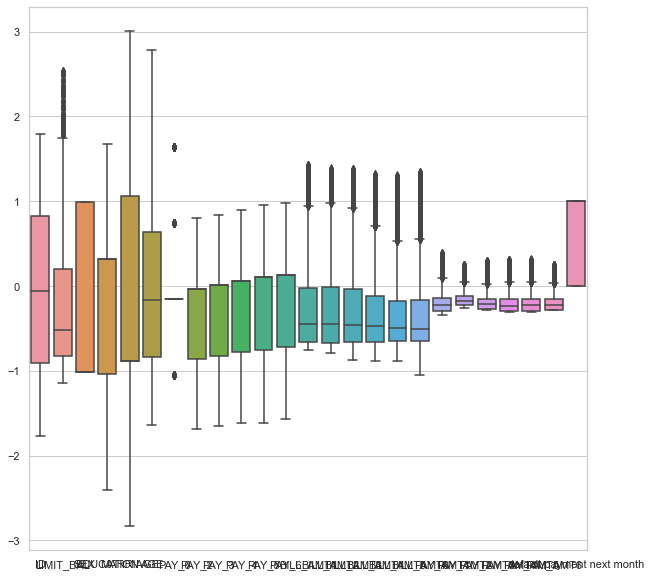

In [31]:
sns.set(style='whitegrid',rc={"figure.figsize":(10, 10)})
sns.boxplot(data=new_xy_data1)

## Again__Data Slicing (Dependent & Independent Variables)

In [32]:
new_xy_data1.shape

(19404, 25)

In [33]:
new_x=new_xy_data1.drop(columns="default payment next month")
new_x

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
2,-1.767110,-0.512453,0.987622,0.319758,1.061028,-0.160926,-0.151611,-0.030260,0.010071,0.058419,...,-0.479199,-0.446442,-0.415268,-0.392938,-0.231975,-0.176435,-0.220196,-0.229339,-0.227984,0.034382
3,-1.766991,-0.830039,0.987622,0.319758,-0.881447,0.179226,-0.151611,-0.030260,0.010071,0.058419,...,0.035924,-0.230487,-0.187220,-0.159508,-0.197726,-0.149402,-0.207478,-0.221988,-0.222979,-0.221523
5,-1.766754,-0.830039,-1.012534,-1.041047,1.061028,0.179226,-0.151611,-0.030260,0.010071,0.058419,...,0.155824,-0.368249,-0.339241,-0.318313,-0.162197,-0.160028,-0.242007,-0.229339,-0.227984,-0.234319
7,-1.766517,-0.433056,0.987622,0.319758,1.061028,-1.408151,-0.151611,-0.859582,-0.821345,0.058419,...,-0.666005,-0.664359,-0.661155,-0.642777,-0.312837,-0.223259,-0.283786,-0.260142,-0.178146,-0.186848
14,-1.765687,0.757893,-1.012534,-1.041047,1.061028,-0.727846,-0.151611,-0.030260,0.010071,0.058419,...,0.241644,0.254181,0.267150,0.273483,-0.126669,-0.098307,-0.093015,-0.082309,-0.082896,-0.093571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46716,-0.111577,0.916686,-1.012534,-1.041047,-0.881447,0.405995,-1.046792,-0.859582,-0.821345,0.058419,...,-0.663193,-0.661023,-0.649713,-0.644711,-0.308787,-0.213103,-0.278826,-0.262862,-0.274557,-0.257542
46717,1.218753,-1.068229,-1.012534,-1.041047,-0.881447,0.632763,-0.151611,-0.030260,0.010071,0.058419,...,-0.422168,-0.381268,-0.350993,-0.352165,-0.241496,-0.182060,-0.182487,-0.243601,-0.240172,-0.232911
46720,0.438291,-0.830039,0.987622,0.319758,-0.881447,-0.954615,0.743570,0.799062,0.841486,0.893225,...,-0.051021,0.007893,0.069588,0.111076,-0.190762,-0.150392,-0.187956,-0.154795,-0.162622,-0.164328
46722,0.748555,-0.988833,-1.012534,0.319758,1.061028,-0.727846,-0.151611,-0.030260,0.010071,0.058419,...,-0.252200,-0.213823,-0.456659,-0.652232,-0.190051,-0.120859,-0.160357,-0.164793,-0.300528,-0.285500


In [34]:
new_y=new_xy_data1['default payment next month']
new_y

2        0
3        0
5        0
7        0
14       0
        ..
46716    1
46717    1
46720    1
46722    1
46726    1
Name: default payment next month, Length: 19404, dtype: int64

## Train Test Split

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(new_x,new_y,test_size=0.2,random_state=31)

In [36]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(15523, 24) (3881, 24) (15523,) (3881,)


##  Logistics Regression

In [37]:
from sklearn.linear_model import LogisticRegression
l1 = LogisticRegression()
l1.fit(x_train, y_train)
y_pred1 = l1.predict(x_test)
print("This is the y prediction :\t")
print(y_pred1)
print("\n")
from sklearn.metrics import accuracy_score
lr = accuracy_score(y_test,y_pred1)*100
print("Accuracy of Logistic Regression:\n",lr)

This is the y prediction :	
[0 0 0 ... 1 0 0]


Accuracy of Logistic Regression:
 71.34759082710642


In [38]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred1)
print(cm)

[[1251  593]
 [ 519 1518]]


Accuracy of Logistic Regression 71.34759082710642


(1251, 593, 519, 1518)

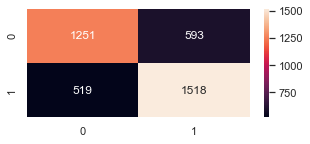

In [39]:
sns.set(style='whitegrid',rc={"figure.figsize":(5, 2)})
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,fmt="d")
print("Accuracy of Logistic Regression",lr)
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
TN,FP,FN,TP

##  Random Forest Algorithm

In [40]:
from sklearn.ensemble import RandomForestClassifier  
rf= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
rf.fit(x_train, y_train)  
y_pred2 = rf.predict(x_test) 
print("This is the y prediction :\t")
print(y_pred2)
print("\n")
from sklearn.metrics import accuracy_score
rf = accuracy_score(y_test,y_pred2)*100
print("Accuracy of Random Forest:\n",rf)

This is the y prediction :	
[1 0 0 ... 0 0 0]


Accuracy of Random Forest:
 83.74130378768359


##  Support Vector Machine(SVM)

In [41]:
from sklearn.svm import SVC # "Support vector classifier"  
s1 = SVC(kernel='linear', random_state=7)  
s1.fit(x_train, y_train)
y_pred3 = s1.predict(x_test)
print("This is the y prediction :\t")
print(y_pred3)
print("\n")
from sklearn.metrics import accuracy_score
svm = accuracy_score(y_test,y_pred3)*100
print("Accuracy of Support Vector Machine:\n",svm) 

This is the y prediction :	
[0 0 0 ... 0 0 0]


Accuracy of Support Vector Machine:
 70.9353259469209


## Using Votting Classifier  with
## (Logistics Regression, SVM, Random Forest)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier

In [43]:
l2 =LogisticRegression()
s2 = SVC()
rf1 = RandomForestClassifier()

In [44]:
l2.fit(x_train,y_train)
s2.fit(x_train,y_train)
rf1.fit(x_train,y_train)

RandomForestClassifier()

#### Prediction

In [45]:
y_pred_1 = l2.predict(x_test)
y_pred_2 = s2.predict(x_test)
y_pred_3 = rf1.predict(x_test)

In [46]:
print(y_pred_1)

[0 0 0 ... 1 0 0]


In [47]:
print(y_pred_2)

[0 0 0 ... 0 0 0]


In [48]:
print(y_pred_3)

[1 0 0 ... 0 0 0]


####  Voting Classifier

In [49]:
from sklearn.ensemble import VotingClassifier
maxvote=VotingClassifier(estimators=([("Logistic",l2),("SVM",s2),("RF",rf1)]))
maxvote.fit(x_train,y_train)

VotingClassifier(estimators=[('Logistic', LogisticRegression()), ('SVM', SVC()),
                             ('RF', RandomForestClassifier())])

In [50]:
y_maxvote=maxvote.predict(x_test)
print(y_maxvote)

[0 0 0 ... 0 0 0]


In [51]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_maxvote,y_test)*100
print("Accuracy of Voting Classifier:\n",ac) 

Accuracy of Voting Classifier:
 80.28858541612986


## Bagging with SVM

In [52]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(base_estimator=s2, n_estimators=5,random_state=40)
bg.fit(x_train, y_train)
bg_pred = bg.predict(x_test)
print(bg_pred)
bg_ac = accuracy_score(bg_pred, y_test)*100
print("Accuracy of Bagging Classifier:\n",bg_ac) 

[0 0 0 ... 0 0 0]
Accuracy of Bagging Classifier:
 77.40273125483122


## Stratified K Fold Cross Validation Technique FOR { Logistic Regression }

In [53]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
skf.get_n_splits()

5

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression 
lr1=LogisticRegression()

In [55]:
scores = cross_val_score(lr1,x_train,y_train,cv=skf)
y_pred_skf = cross_val_predict(lr1,x_test,y_test)


In [56]:
print(y_pred_skf)

[0 0 0 ... 1 0 0]


In [57]:
print(scores)

[0.70950081 0.70628019 0.70499195 0.69619845 0.70393041]


In [58]:
from statistics import mean
skf1=mean(scores)*100
print("Accuracy of Stratified K Fold:",skf1)

Accuracy of Stratified K Fold: 70.4180362567857


## Appendix

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.ensemble import BaggingClassifier
bg_knn = BaggingClassifier(base_estimator=knn, n_estimators=5,random_state=40)
bg_knn.fit(x_train, y_train)
bg_knn_pred = bg_knn.predict(x_test)
print(bg_knn_pred)
bg_knn_ac = accuracy_score(bg_pred, y_test)*100
print("Accuracy of Bagging Classifier:\n",bg_ac) 

[1 0 0 ... 0 1 0]
Accuracy of Bagging Classifier:
 77.40273125483122
